# Similarity-Based Constraint Score For Feature Selection Notebook

In this notebook, you will find a comprehensive summary of the project, detailing key steps undertaken and presenting results obtained during the implementation of our innovative constraint score.



## Part 1: Contraint score 4
Firstly we would like to implement the contraints score 4: $ \begin{equation}
SC^4_r = \frac{\tilde{f_r}^TL\tilde{f_r}}{\tilde{f_r}^TD\tilde{f_r}}*\frac{{f_r}^TL^\mathcal{M}f_r}{{f_r}^TL^\mathcal{C}f_r} = SL_r*SC_r
\end{equation} $
And see if our results correspond to the outcomes in the thesis by Maryam Kalakesh on the wine dataset.

In [23]:
%cd /Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS
import numpy as np
import pandas as pd
import sklearn.datasets as skd

/Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS


/Users/fabiogadegbeku/Desktop/M1_DS/projet_recherche/Similarity-Based-CS/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [24]:
from c_scores import laplacian_score
X = skd.load_wine()
X_wine = X.data
laplacian_score(X_wine) ## Compute the Laplacian Score for features of the wine dataset
X_wine.shape

(178, 13)

In [25]:
from c_scores import get_constraints
X_target = X.target[np.newaxis].T
get_constraints(X_target)[0]

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [26]:
## Generate random constraints for the wine dataset
from c_scores import generate_constraints
X_target_constraint= generate_constraints(X_target, 60)[np.newaxis].T

In [27]:
##compute the constraint score for the wine dataset
from c_scores import constraint_score_1
X_wine = X.data
constraint_score_4 = laplacian_score(X_wine)*constraint_score_1(X_wine,X_target_constraint)
## The ranks of the features according to the constraint score are stored in the variable features
features = np.argsort(constraint_score_4)
print(features[1:],features)

[ 4  6  9  3 11  5 10  0  2  8  1  7] [12  4  6  9  3 11  5 10  0  2  8  1  7]


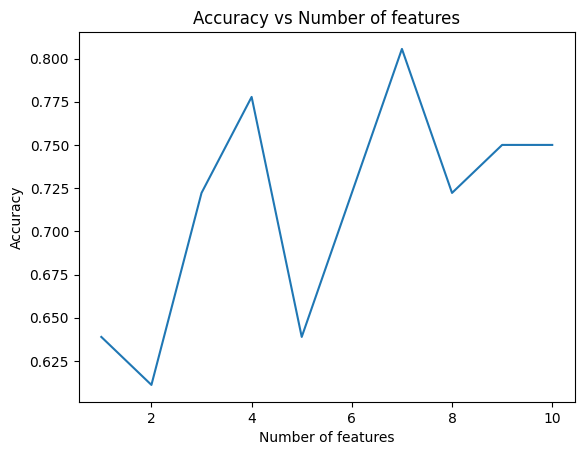

In [28]:
##plot the scores for how many features are kept based on there constraint scores.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as Knn
import matplotlib.pyplot as plt
n = 11
Accuracy = []
knn = Knn(n_neighbors=1)
for i in range(1,n):
    X_wine = np.concatenate((X.data,X.target[np.newaxis].T), axis=1)
    X_wine = np.delete(X_wine, features[i:], axis=1)
    X_wine_train , X_wine_test = train_test_split(X_wine, test_size=0.2)  ## REDO the repartition of the data
    y_train = X_wine_train[:,-1]
    y_test = X_wine_test[:,-1]
    X_wine_train = np.delete(X_wine_train, -1, axis=1)
    X_wine_test = np.delete(X_wine_test, -1, axis=1)
    knn.fit(X_wine_train, y_train)
    y_pred = knn.predict(X_wine_test)
    Accuracy.append(np.mean(y_pred == y_test))

plt.plot(range(1,n),Accuracy)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of features')
plt.show()

